# Accelerometer Data Prediction #

The prediction is done by Binary classification model using logistic regression which turns out to be efficient enough to predict 
if the reading is of phone falling in the ground or when a car experiences a crash.

The two dataset provided were "PHONE FALL DATA FILE" and "ACCIDENTAL DATA FILE"
An additional column named 'label' is introduced in dataset where 1 signifies " a car accident" and  0 signifies " phone fall ".

The two dataset are then combined together and randomly arranged to get an uniform dataset which enhances the training and testing of data.

Then out of the entire set 2400 dataset are taken as training set and others are taken as testing set, which are data_train.csv and data_test.csv respectively.

The model achieves a train accuracy: 98.25 % and test accuracy: 97.45454545454545 %  which is a perfect fit to the model as it behaves efficiently both on training and test data set.

##  Packages ##

- numpy is the fundamental package for scientific computing with Python.
- pandas is a common package to interact with a dataset that is stored on a csv file.
- matplotlib is a famous library to plot graphs in Python.


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
pf=pd.read_csv('data_train.csv')
print(pf)

      ACTUAL TIME (ms)  TIME INTERVAL (ms)   Accel X   Accel Y  label
0               6844.0                   2  0.367523  4.859955      0
1               2713.0                   5 -0.501419  4.796661      0
2               4426.0                   3  0.112259  5.099625      0
3               2663.0                   6 -0.342300  5.045715      0
4              11302.0                   5  0.446625  4.352188      0
5              10513.0                   8  0.731201  4.761597      0
6              10880.0                   8  0.293854  4.296295      0
7               1757.0                   4 -1.313553  5.321991      0
8               6528.0                   4  0.327805  4.879898      0
9              10606.0                   3  0.386780  4.558838      0
10              6291.0                   5  0.201263  4.811081      0
11              3362.0                   6 -0.435440  4.775955      0
12              6242.0                   6  0.299576  4.948379      0
13             11002

In [3]:
input_parameter=["Accel X","Accel Y"]
X_train=np.array(pf[input_parameter])
X_train=X_train.T
output_parameter=['label']
Y_train=np.array(pf[output_parameter])
Y_train=Y_train.T

In [4]:
X_train,Y_train

(array([[ 0.3675232 , -0.50141907,  0.11225891, ...,  0.13214111,
          0.30265808,  0.47750854],
        [ 4.859955  ,  4.7966614 ,  5.0996246 , ...,  5.220215  ,
          5.097458  ,  4.462784  ]]),
 array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64))

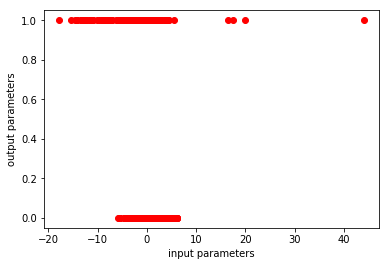

In [5]:
plt.plot(X_train.T,Y_train.T,'ro')
plt.xlabel("input parameters")
plt.ylabel("output parameters")
plt.show()

## General Architecture of the learning algorithm ##

**Mathematical expression of the algorithm**:

For one example $x^{(i)}$:
$$z^{(i)} = w^T x^{(i)} + b $$
$$\hat{y}^{(i)} = h^{(i)} = sigmoid(z^{(i)})$$ 
$$ \mathcal{L}(h^{(i)}, y^{(i)}) =  - y^{(i)}  \log(h^{(i)}) - (1-y^{(i)} )  \log(1-h^{(i)})$$

The cost is then computed by summing over all training examples:
$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(h^{(i)}, y^{(i)})$$

### Initializing parameters

A random initialisation of w and b parameter enhances the model to train quickly and efficiently

In [6]:
#Initialization of parameters

def initialize_parameter(X):
    w=np.random.randn(X.shape[0])*0.01
    b=np.random.randn()*0.01
    return w,b

### Sigmoid function

As shown earlier,there is a need to compute $sigmoid( w^T x + b) = \frac{1}{1 + e^{-(w^T x + b)}}$ to make predictions, which restricts the value to be between 0 and 1

In [7]:
def sigmoid(z):
    s = 1/(1+np.exp(-z))
    return s

### Forward and Backward propagation

Forward Propagation:
-  get X
-  compute $A = \sigma(w^T X + b) = (a^{(1)}, a^{(2)}, ..., a^{(m-1)}, a^{(m)})$
-  calculate the cost function: $J = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)})$

Here are the two formulas you will be using: 

$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T\tag{7}$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})\tag{8}$$

In [8]:
# Cost function

def propagate(w, b, X, Y):
    
    m=X.shape[1]
    h=sigmoid(np.dot(w.T,X)+b)
    cost=np.sum(-Y*np.log(h)-(1-Y)*np.log(1-h))/m
    
    dw = np.dot(X,(h-Y).T)/m
    db = np.sum(h-Y)/m
    
    grads = {"dw": dw,
             "db": db}
    
    return grads,cost

In [9]:
def optimize(w, b, X, Y, num_iterations, learning_rate):
    costs = []
    
    for i in range(num_iterations):
        grads, cost = propagate(w,b,X,Y)
        dw = grads["dw"]
        db = grads["db"]
        w = w-learning_rate*dw
        b = b-learning_rate*db
        costs.append(cost)
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [10]:
def predict(w, b, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    h = sigmoid(np.dot(w.T,X)+b)
    for i in range(h.shape[1]):
        if h[0,i]>=0.5:
            Y_prediction[0,i]=1
        else:
            Y_prediction[0,i]=0
    return Y_prediction

In [11]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5):
    w, b = initialize_parameter(X_train)
    parameters, grads, costs = optimize(w,b,X_train,Y_train,num_iterations, learning_rate)
    w = parameters["w"]
    b = parameters["b"]
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w,
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    return d

### Testing of model

The model trained against the data_train.csv is tested against data_test.csv

In [12]:
pf=pd.read_csv('data_test.csv')
print(pf)

     ACTUAL TIME (ms)  TIME INTERVAL (ms)   Accel X   Accel Y  label
0              8458.0                   8  1.161255  5.022736      0
1              9946.0                   4  0.753708  4.671921      0
2             12229.0                   4  0.499664  4.437469      0
3              3587.0                   3 -0.400024  4.869095      0
4              5134.0                   3 -0.097015  4.938004      0
5              3864.0                   4 -0.369064  4.738236      0
6              2665.0                   2 -0.355011  5.013504      0
7              7317.0                   4 -0.269333  4.544189      0
8                 NaN                  98 -2.600000 -0.200000      1
9              7763.0                   4  0.566406  3.075760      0
10             3759.0                   4 -0.306656  4.908905      0
11             3763.0                   4 -0.312210  4.905243      0
12             7383.0                   3  0.548096  4.688080      0
13             2126.0             

In [13]:
X_test=np.array(pf[input_parameter])
X_test=X_test.T
Y_test=np.array(pf[output_parameter])
Y_test=Y_test.T

In [14]:
d = model(X_train,Y_train,X_test,Y_test, num_iterations = 2000, learning_rate = 0.005)

train accuracy: 98.25 %
test accuracy: 97.45454545454545 %


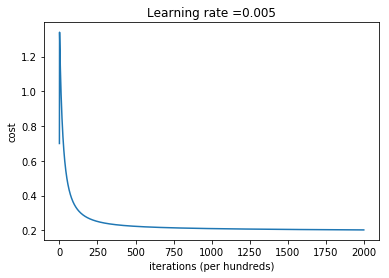

In [15]:
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

In [16]:
X_train=np.concatenate((X_train.T,X_test.T)).T
Y_train=np.concatenate((Y_train.T,Y_test.T)).T
parameters, grads, costs = optimize(d["w"],d["b"],X_train,Y_train,num_iterations=2000, learning_rate=0.005)
d["w"] = parameters["w"]
d["b"] = parameters["b"]

### Testing of new values and training the ones not present

The code segment tests newly introduced values and also trains any data newly encountered.

In [23]:
ch=input("Do you want to test against a set of data?(Y/N):")
while(ch=='Y'):
    x_acc=float(input("Enter the x-acceleration:"))
    y_acc=float(input("Enter the y-acceleration:"))
    x_label=np.zeros((1,2))
    x_label[0][0]=x_acc
    x_label[0][1]=y_acc
    y_label=np.zeros((1,1))
    y_label=sigmoid(np.dot(d["w"].T,x_label.T)+d["b"])
    if y_label[0]>0.5:
        print("Accident")
        y_label[0]=1
    else:
        print("Phone Fall")
        y_label[0]=0
    pred=input("Prediction Correct?(Y/N)")
    if pred=='N':
        y_label=1-y_label
    flag=True
    for x,y in X_train.T:
        if x_acc==x and y_acc==y:
            flag=False
            break
    if flag==True:
        X_train=np.concatenate((X_train.T,x_label)).T
        Y_train=np.concatenate((Y_train,y_label[0]),axis=1)
        parameters, grads, costs = optimize(d["w"],d["b"],X_train,Y_train,num_iterations=2000, learning_rate=0.005)
        d["w"] = parameters["w"]
        d["b"] = parameters["b"]
    ch=input("Do you want to test against a set of data?(Y/N):")

Do you want to test against a set of data?(Y/N):N
